<a href="https://colab.research.google.com/github/Travistyse/Travistyse.github.io/blob/master/Original_Dataset_CatAdoption_BuildWk1_TravisFoster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to determine what factors play a role in cat adoption rates using data from the Austin Animal Center Shelter's dataset which can be found [here](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and#aac_shelter_cat_outcome_eng.csv) - I'm using the dataset that's been engineered for the outcome analysis I'm about to do. 

I hope to present visualizations and insights which are interesting enough to overcome what I presume must be at least a handful of other similar reports. I've chosen not to read them for the sake of not demotivating myself or feeling unoriginal given that the most important aspect of this analysis is the fact that I'm doing it and the outcome is meeting or exceeding expectations.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = "/content/drive/My Drive/Lambda/Unit 1/Build/aac_shelter_cat_outcome_eng.csv"
shelter_df = pd.read_csv(file_path)

In [0]:
shelter_df.head(10)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Cat/Kitten (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,1,Male,No,2,7,14,0.038356,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2014,7,2014-07,7,2014,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,1,Female,No,1,30,30,0.082192,Kitten,Intact Female Kitten,"(-0.022, 2.2]",2014,6,2014-08,8,2014,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,1,Female,Yes,3,30,90,0.246575,Kitten,Spayed Female Kitten,"(-0.022, 2.2]",2014,3,2014-06,6,2014,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,1,Female,Yes,1,365,365,1.000000,Cat,Spayed Female Cat,"(-0.022, 2.2]",2013,3,2014-03,3,2014,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,Transfer,Intact Male,1,Male,No,3,7,21,0.057534,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2013,12,2014-01,1,2014,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,Adoption,Spayed Female,1,Female,Yes,2,30,60,0.164384,Kitten,Spayed Female Kitten,"(-0.022, 2.2]",2014,6,2014-08,8,2014,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
6,8 months,A673952,Cat,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,Transfer,Unknown,1,Female,Yes,8,30,240,0.657534,Cat,Unknown Cat,"(-0.022, 2.2]",2013,7,2014-03,3,2014,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,Adoption,Neutered Male,1,Male,Yes,5,30,150,0.410959,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",2014,3,2014-08,8,2014,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,Adoption,Neutered Male,1,Male,Yes,2,30,60,0.164384,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",2014,8,2014-10,10,2014,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
9,1 year,A668547,Cat,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,Transfer,Neutered Male,1,Male,Yes,1,365,365,1.000000,Cat,Neutered Male Cat,"(-0.022, 2.2]",2012,12,2013-12,12,2013,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black


In [0]:
shelter_df['animal_type'].value_counts()

Cat    29421
Name: animal_type, dtype: int64

In [0]:
# I won't be using these c:
shelter_df = shelter_df.drop( [ 'animal_id', 'animal_type' ], axis=1 )

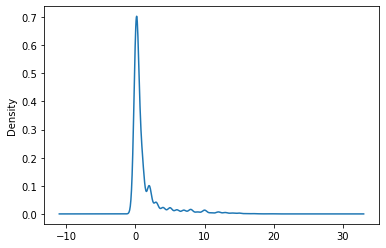

In [0]:
shelter_df['outcome_age_(years)'].plot.density();

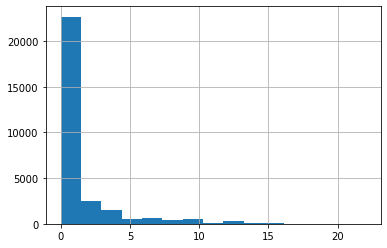

In [0]:
shelter_df['outcome_age_(years)'].hist(bins=15);

I'm noticing that the data shows a signficant portion of cats which are adopted are between 0 and 1 years old, followed by a preference order of roughly 1 - 4 years, and from there it seems like if you're willing to adopt an older cat than that it no longer matters all that much how old the cat is - I hypothesize, even, that the low number of cats available in the after 13 year range may be the reason for the drop off. Lots of data exploration lies ahead!

I want to start by normalizing the data around population age - so that the fewer number of older cats (if even true) doesn't impact the data with a significant bias toward younger cats - even though I strongly believe that in the real world such a bias does exist, I don't need to inflate that bias by infusing it with a selection bias as well.

I'm not entirely sure if this dataset even has the data I need to normalize, but I'm going to try nonetheless! :D

Actually, it has to - this dataset includes ALL cats - not just those that were adopted - and therefor my initial paragraph is based in error - this is the total population age density - not just those that were adopted.

In [0]:
shelter_df.shape

(29421, 35)

I want to standardize my data by age range but unfortunately that's something that's outside of the scope of this build week and is covered in the next unit - so I'm binning my values instead (:

In [0]:
shelter_df['age_group'].value_counts()

(-0.022, 2.2]    25107
(2.2, 4.4]        1554
(4.4, 6.6]         901
(6.6, 8.8]         724
(8.8, 11.0]        599
(11.0, 13.2]       297
(13.2, 15.4]       151
(15.4, 17.6]        58
(17.6, 19.8]        16
(19.8, 22.0]        14
Name: age_group, dtype: int64

I don't think that's good enough - I think there are too many bins for the older cats given their very low population counts

In [0]:
#Teen removed due to lack of age range 
#shelter_df['binned_outcome_age_(years)'] = pd.cut(x = shelter_df['outcome_age_(years)'], bins = [0, 0.5, 1.0, 1.5, 2.0, 4.0, 8.0, 22.0], labels = ['baby', 'kitten', 'teen', 'adult', 'Older Adult', 'Midlife', 'Twilight'])
shelter_df['binned_outcome_age_(years)'] = pd.cut(x = shelter_df['outcome_age_(years)'], bins = [0, 0.5, 1.0, 2.0, 4.0, 8.0, 22.0], labels = ['baby', 'kitten', 'adult', 'Older Adult', 'Midlife', 'Twilight'])

I've chosen these years because I believe that 0 - 0.5 is seen as a cat in need of fostering, 0.5 - 1.0 is seen as a perfect cat capable of adapting to a new home and is "truly yours" because it's likely never had another home / is very young, 1.0 - 1.5 is barely outside of that range, 1.5 - 2.0 is an adult cat, 2.0 - 4.0 is likely seen as a cat set in their ways and sad because they're losing their previous lifestyle or home, 4.0 - 8.0 is their last hurrah, and 8 - 22 is seen as an old, on their way to the grave cat.

Are these true facts? Don't know - I don't speak for everyone - but I think it's a fair opening opinion. Ideally I'd like to look at the data and see what the data says before inserting my own opinion but this is necessary right now (:

In [0]:
shelter_df['binned_outcome_age_(years)'].head(10)

0      baby
1      baby
2      baby
3    kitten
4      baby
5      baby
6    kitten
7      baby
8      baby
9    kitten
Name: binned_outcome_age_(years), dtype: category
Categories (6, object): [baby < kitten < adult < Older Adult < Midlife < Twilight]

In [0]:
shelter_df['binned_outcome_age_(years)'].value_counts()

baby           17966
kitten          4636
adult           2455
Midlife         1625
Older Adult     1554
Twilight        1135
Name: binned_outcome_age_(years), dtype: int64

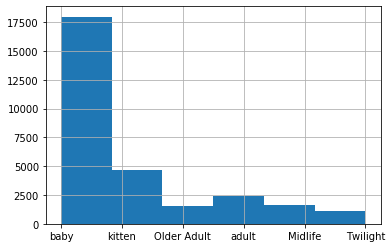

In [0]:
shelter_df['binned_outcome_age_(years)'].hist(bins = 6);

In [0]:
shelter_df.head(100)

,age_upon_outcome,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Cat/Kitten (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat,binned_outcome_age_(years)
0,2 weeks,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,1,Male,No,2,7,14,0.038356,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2014,7,2014-07,7,2014,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange,baby
1,1 month,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,1,Female,No,1,30,30,0.082192,Kitten,Intact Female Kitten,"(-0.022, 2.2]",2014,6,2014-08,8,2014,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue,baby
2,3 months,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,1,Female,Yes,3,30,90,0.246575,Kitten,Spayed Female Kitten,"(-0.022, 2.2]",2014,3,2014-06,6,2014,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white,baby
3,1 year,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,1,Female,Yes,1,365,365,1.000000,Cat,Spayed Female Cat,"(-0.022, 2.2]",2013,3,2014-03,3,2014,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black,kitten
4,3 weeks,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,Transfer,Intact Male,1,Male,No,3,7,21,0.057534,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2013,12,2014-01,1,2014,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black,baby
5,2 months,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,Adoption,Spayed Female,1,Female,Yes,2,30,60,0.164384,Kitten,Spayed Female Kitten,"(-0.022, 2.2]",2014,6,2014-08,8,2014,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown,baby
6,8 months,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,Transfer,Unknown,1,Female,Yes,8,30,240,0.657534,Cat,Unknown Cat,"(-0.022, 2.2]",2013,7,2014-03,3,2014,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown,kitten
7,5 months,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,Adoption,Neutered Male,1,Male,Yes,5,30,150,0.410959,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",2014,3,2014-08,8,2014,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black,baby
8,2 months,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,Adoption,Neutered Male,1,Male,Yes,2,30,60,0.164384,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",2014,8,2014-10,10,2014,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange,baby
9,1 year,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,Transfer,Neutered Male,1,Male,Yes,1,365,365,1.000000,Cat,Neutered Male Cat,"(-0.022, 2.2]",2012,12,2013-12,12,2013,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black,kitten


So apparently the Teen age range doesn't exist. Oh well. Dropped it and re-ran the notebook.

- What day of the week is most popular outgoing?

- Incoming?

- What month of the year is the most popular?

- Least?




In [0]:
shelter_df['datetime'].dtypes

dtype('O')

In [0]:
shelter_df['datetime'] = shelter_df['datetime'].replace({'?':np.NaN})

In [0]:
shelter_df['datetime'].isna().sum()

0

In [0]:
shelter_df['datetime'].isnull().sum()

0

In [0]:
#shelter_df['datetime'] = shelter_df['datetime'][~np.isnan(shelter_df['datetime'])]

In [0]:
#shelter_df['datetime'].plot.density();

In [0]:
#shelter_df['datetime'].dt.year.plot.density();

In [0]:
#pd.to_datetime(shelter_df['datetime']).plot.density();

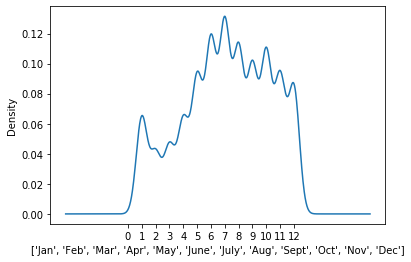

In [0]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
pd.to_datetime(shelter_df['datetime']).dt.month.plot.density();
plt.show()

There's a very obvious spike from April through July that carries through to January before dipping back down. July is the highest spike and therefor is the most popular month for incoming cats. February-March appears to be the least popular.

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.month.value_counts().sort_index()

1     1879
2     1142
3     1284
4     1771
5     2574
6     3261
7     3603
8     3093
9     2750
10    3042
11    2577
12    2445
Name: datetime, dtype: int64

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.month.value_counts().unique()

array([3603, 3261, 3093, 3042, 2750, 2577, 2574, 2445, 1879, 1771, 1284,
       1142])

So with these two combined I can determine that July is, in fact, the busiest but that June, August, and October are close behind.

By far February and March are the worst, with only April and January even close - and yes, it turns out that January doesn't perform all that well.

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.day.value_counts().sort_index()

1     1013
2      922
3      881
4      857
5      896
6      929
7      867
8      938
9     1022
10     853
11     974
12    1083
13    1009
14     960
15     838
16     908
17     962
18    1074
19    1120
20     981
21    1008
22     986
23     941
24     979
25     927
26    1014
27     989
28     970
29    1016
30     983
31     521
Name: datetime, dtype: int64

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.day.value_counts().unique()

array([1120, 1083, 1074, 1022, 1016, 1014, 1013, 1009, 1008,  989,  986,
        983,  981,  979,  974,  970,  962,  960,  941,  938,  929,  927,
        922,  908,  896,  881,  867,  857,  853,  838,  521])

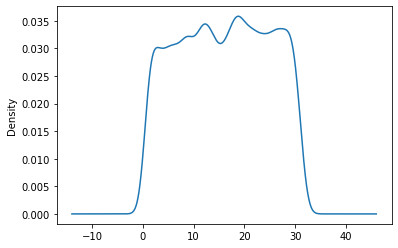

In [0]:
pd.to_datetime(shelter_df['datetime']).dt.day.plot.density();

There's generally a trend upward as the month goes on but the absolute value difference isn't all that high. There aren't many months with 31 days so it makes sense that there would be fewer overall incoming on that (usually non-existant) day of the average month.

In [0]:
shelter_df['outcome_weekday'].value_counts().sort_index()

Friday       3934
Monday       3944
Saturday     5151
Sunday       4468
Thursday     3618
Tuesday      4473
Wednesday    3833
Name: outcome_weekday, dtype: int64

In [0]:
shelter_df['outcome_type'].value_counts()

Transfer           13323
Adoption           12732
Euthanasia          1452
Return to Owner     1431
Died                 403
Rto-Adopt             33
Missing               28
Disposal              16
Name: outcome_type, dtype: int64

I just want to take a second to point out that you're more likely to die before your owner actually comes for you. That's a "big oof". What's interesting, however, is that 5% of all the cats are euthanized and 1.36% die. Beyond that, 5% are returned to their owners and while 43% are adopted, 45.2% are transferred out of the facility.

In [0]:
condition = shelter_df['outcome_type'] == 'Missing'
shelter_df['outcome_type'][condition]

3948     Missing
4383     Missing
5194     Missing
6306     Missing
9986     Missing
11248    Missing
12126    Missing
12320    Missing
12451    Missing
12469    Missing
13581    Missing
14273    Missing
14294    Missing
14791    Missing
15495    Missing
15645    Missing
18443    Missing
19708    Missing
20952    Missing
22862    Missing
22921    Missing
23043    Missing
23888    Missing
24104    Missing
24557    Missing
25296    Missing
25582    Missing
28466    Missing
Name: outcome_type, dtype: object

In [0]:
shelter_df['name'][condition]

3948           NaN
4383          *Kit
5194        *Isaac
6306           NaN
9986     *Sapphire
11248          NaN
12126     *Ora Lee
12320    *Victoria
12451          NaN
12469     *Frankie
13581      *Cecily
14273     Cinnamon
14294          NaN
14791          NaN
15495       Twiggy
15645         *Meg
18443        Freya
19708          *Ed
20952       Goldie
22862       *Alice
22921          NaN
23043        Monti
23888      *Trixie
24104         Moma
24557     *Cannoli
25296          NaN
25582          NaN
28466       *Ralph
Name: name, dtype: object

In [0]:
shelter_df['breed'][condition]

3948      domestic shorthair
4383      domestic shorthair
5194      domestic shorthair
6306      domestic shorthair
9986     domestic mediumhair
11248     domestic shorthair
12126     domestic shorthair
12320     domestic shorthair
12451     domestic shorthair
12469     domestic shorthair
13581     domestic shorthair
14273     domestic shorthair
14294     domestic shorthair
14791     domestic shorthair
15495     domestic shorthair
15645     american shorthair
18443      domestic longhair
19708     domestic shorthair
20952     domestic shorthair
22862     domestic shorthair
22921     domestic shorthair
23043     domestic shorthair
23888     domestic shorthair
24104    domestic mediumhair
24557                siamese
25296                siamese
25582     domestic shorthair
28466     domestic shorthair
Name: breed, dtype: object

In [0]:
shelter_df['binned_outcome_age_(years)'][condition]

3948       kitten
4383         baby
5194         baby
6306         baby
9986         baby
11248        baby
12126        baby
12320        baby
12451        baby
12469        baby
13581      kitten
14273      kitten
14294        baby
14791        baby
15495        baby
15645        baby
18443     Midlife
19708        baby
20952     Midlife
22862        baby
22921        baby
23043        baby
23888        baby
24104    Twilight
24557        baby
25296        baby
25582        baby
28466        baby
Name: binned_outcome_age_(years), dtype: category
Categories (6, object): [baby < kitten < adult < Older Adult < Midlife < Twilight]

Well, as for the ones that are stolen or "escape", it appears that being 6 months old or younger and a domestic shorthair are the most popular targets :3

In [0]:
shelter_df['sex'].value_counts()

Female    16195
Male      13226
Name: sex, dtype: int64

More Females than males

In [0]:
condition = shelter_df['outcome_type'] == 'Euthanasia'
shelter_df['outcome_type'][condition]

26       Euthanasia
29       Euthanasia
43       Euthanasia
47       Euthanasia
49       Euthanasia
            ...    
29334    Euthanasia
29337    Euthanasia
29350    Euthanasia
29377    Euthanasia
29413    Euthanasia
Name: outcome_type, Length: 1452, dtype: object

In [0]:
shelter_df['sex'][condition].value_counts()

Female    774
Male      678
Name: sex, dtype: int64

In [0]:
shelter_df['binned_outcome_age_(years)'][condition].value_counts()

baby           575
Twilight       209
kitten         201
adult          179
Midlife        166
Older Adult    119
Name: binned_outcome_age_(years), dtype: int64

Apparently, in raw absolute values, there are more kittens and baby cats that are euthanized than Twilight or any of the other categories. Given the significant population difference, however, that's not exactly as huge a surprise as one would think.

In [0]:
'''
Baby           17966
Kitten          4636
Adult           2455
Midlife         1625
Older Adult     1554
Twilight        1135

baby           575
Twilight       209
kitten         201
adult          179
Midlife        166
Older Adult    119
'''

print('Baby: ', (575 / 17966) )
print('Kitten: ', (201 / 4636) )
print('Adult: ', (179 / 2455) )
print('Midlife: ', (166 / 1625) )
print('Older Adult: ', (119 / 1554) )
print('Twilight: ', (209 / 1135) )

Baby:  0.03200489814093287
Kitten:  0.043356341673856776
Adult:  0.07291242362525459
Midlife:  0.10215384615384615
Older Adult:  0.07657657657657657
Twilight:  0.1841409691629956


```
Baby:        3.2%

Kitten:      4.33%

Adult:       7.29%

Older Adult: 7.657%

Midlife:     10.21%

Twilight:    18.41%
```

So, yeah, there's a pretty strong positive correlation between age and the odds you're gonna be euthanized.

What about the time you're brought in?
What about the length of time you've stayed?

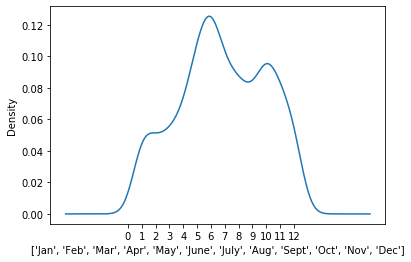

In [0]:
# Looking to graph date brought in (month) against Euthanized 
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
pd.to_datetime(shelter_df['datetime'][condition]).dt.month.plot.density();
plt.show()

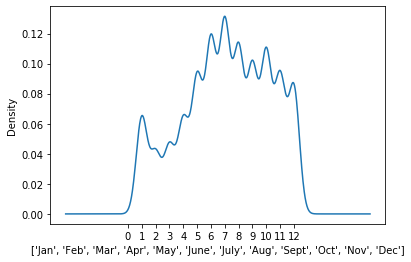

In [0]:
plt.xticks(np.arange(0, 13, 1.0))
plt.xlabel(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
pd.to_datetime(shelter_df['datetime']).dt.month.plot.density();
plt.show()

Generally it appears that the population influx follows the incoming curve, albeit with fewer spikes but there's also less data so a smoother curve is expected. 

So, unfortunately, it looks like intake data is unavailable - and "period range" has no correlation to anything? Comparing, say, a cat that was outgoing at the end of the month or beginning of the month, with a period range of 30 or 60 days, the date is only month-accurate but it's always the exact same month and year. There doesn't appear to be any way to determine how long a cat has been in the shelter beyond potentially trying to deduce some information from date of birth but, overall, it looks like I mistakenly thought there was a column for intake date. 

...BUUUUUT :D I googled for it and found it! :D It's actually EVEN MORE data! Going to see if there's an up to date outgoing dataset as well! 

...OMG YES! :DDD

...Nope. The data was -.- a complete waste of time. Going to have to figure out what could've been done for future reference later, but for the scope of this build week I've had to revert to this.